# Data 201A Machine Learning in Python Group Project 

## Project Name: Heart Disease Exploratory Analysis
## Collaborators: Sophia Zhang, Xinyi Xu, Yuanyuan Teng

Welcome to our Data 201A Group Project Jupyter notebook

In this project we will be analyzing heart disease data collected from hospital patients for predictive indicators.

Purpose:  The objective of our project is to determine which variables are correlated with incidence of heart disease and can lead to a diagnosis.
#Our goal is to better understand the relationships between the various patient attributes.

Dataset:  Source: https://www.kaggle.com/ronitf/heart-disease-uci

Background: The data comes from the Cleveland Clinic database and was gathered from patients who were admitted to hospitals for heart attack or chest pains and had ECG performed on them. Patients from hospitals in Cleveland, Switzerland, and Hungary have been included in the dataset, all identifying variables have been removed. This set has been used for predictive modelling and machine learning.

Descriptions of data: The data has 14 variable columns and 302 patient observations (rows). The variables include: age, blood pressure, heart rate, chest pain type, blood disorder presence, cholesterol, blood sugar, number of blocked major blood vessels and ECG reading data like ST Depression, slope, which follow the lines in a hospital ECG reading. As well, included is the target variable, whether the patient was diagnosed with heart disease or not.

Methodology: 
In order to analyze these data, we researched the impact of these variables on heart  disease and formulate a hypotheses of which ones we think impact the diagnosis the most. We then filtered the data based on our research and relevant information. We created some exploratory graphs with which to analyze the data to see how our hypothesis fared.
We then updated our initial assumptions based on the findings of this analysis

Questions we asked:

Which variables best predict heart disease?

Are there any variables that are unexpectedly better predictors than others?

In [1]:
#Preliminaries: import libraries
import numpy as np
import pandas as pd
#tools for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the data file
dt = pd.read_csv('heart.csv') 

In [4]:
#Check the columns and variables
dt.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [41]:
#Look at dimensions of data
dt.shape

(303, 14)

In [5]:
#Defining the variables:
# age: The person's age in years
# sex: The person's sex, binary variable (1 = male, 0 = female)
# cp: The chest pain experienced on a scale of 1 to 4 (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
#(Angina is a type of chest pain caused by reduced blood flow to the heart, a symptom of coronary artery disease.)
# trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
# chol: The person's cholesterol measurement in mg/dl
# fbs: The person's fasting blood sugar (level > 120 mg/dl, 1 = true; 0 = false)
# restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# thalach: The person's maximum heart rate achieved in bpm
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# ca: The number of major vessels (0-3)
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
# target: patient has Heart disease (0 = no, 1 = yes)

In [3]:
#Rename columns with more descriptive names

dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [4]:
#Change binary variables to their corresponding categorical value to clarify interpretation

dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

<ipython-input-4-31b9035eabdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['sex'][dt['sex'] == 0] = 'female'
<ipython-input-4-31b9035eabdf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
<ipython-input-4-31b9035eabdf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
<ipython-i

In [8]:
#Check the renamed columns and variables
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [9]:
#Check data types
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [10]:
#Look at summary of data
dt.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [11]:
#Count how many people have heart disease in our dataset
print(dt['target'].value_counts())
#More than half have it
print(165/(165+138))

1    165
0    138
Name: target, dtype: int64
0.5445544554455446


In [12]:
#Major factors that we think may impact risk of heart disease: 
#Overweight, having diabetes, high cholesterol, high blood pressure, not enough physical inactivity, and smoking
#Let's examine these variables with graphs

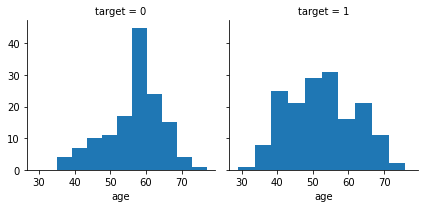

In [13]:
#categorize heart disease vs no heart disease for age
#distribution is fairly evenly distributed and not skewed towards seniors as thought
#Target=0: No heart disease
#Target=1: Heart disease
age_dis= sns.FacetGrid(dt, col="target")
age_dis.map(plt.hist, "age")

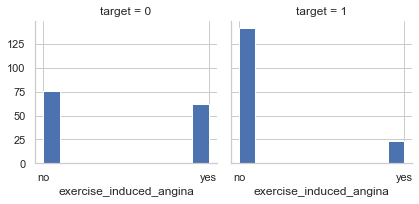

In [42]:
#categorize excerise induced angina
#graph unexpectedly shows that people with heart disease do not get chest pains from exercise
#this is opposite of our initial assumption

ex_dis= sns.FacetGrid(dt, col="target")
ex_dis.map(plt.hist, "exercise_induced_angina")

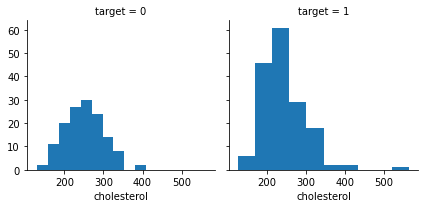

In [15]:
#categorize heart disease vs no heart disease for cholesterol level
#distribution skews slightly high for those with heart disease but mean about the same
#we will look at a age distributed graph later to get a better idea

choles= sns.FacetGrid(dt, col="target")
choles.map(plt.hist, "cholesterol")

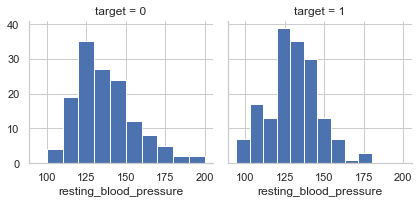

In [43]:
#categorize heart disease vs no heart disease for resting blood pressure
#distribution amount the same so no significant effect from blood pressure

bp= sns.FacetGrid(dt, col="target")
bp.map(plt.hist, "resting_blood_pressure")

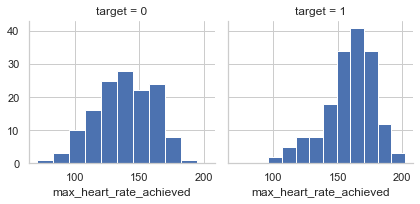

In [44]:
#categorize heart disease vs no heart disease for max heart rate achieved
#distribution skews high for those with heart disease
#max heart rate is a better predictor of heart disease

hrate= sns.FacetGrid(dt, col="target")
hrate.map(plt.hist, "max_heart_rate_achieved")

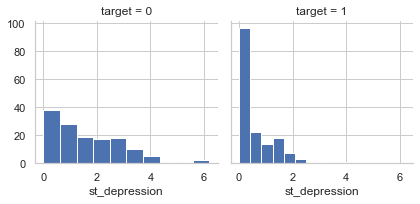

In [51]:
#categorize heart disease vs no heart disease for ST depression
#distribution sees a sharp increase for those with heart disease at 0 ST (relates to positions on the ECG plot))

st_dep= sns.FacetGrid(dt, col="target")
st_dep.map(plt.hist, "st_depression")


Text(0.5, 1.0, 'Distribution of Fasting Blood Sugar Level')

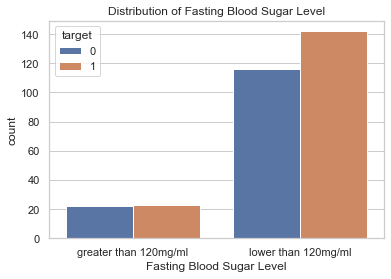

In [48]:
#countplot for fasting blood sugar; high sugar level is an indication of diabetes
#Unexpectedly those with lower blood sugar sees higher incidence of heart disease

sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="fasting_blood_sugar", hue= "target", data=dt)
plt.xlabel('Fasting Blood Sugar Level')
plt.title('Distribution of Fasting Blood Sugar Level')

Text(0.5, 1.0, 'Distribution of ECG Readings')

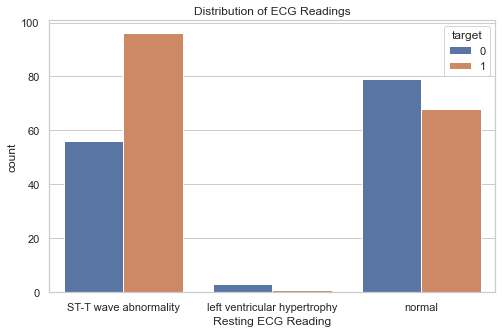

In [47]:
#Let's look with resting ECG measures, 
#looks like abnormal ECG reading is associated with more cases of heart disease


plt.figure(figsize = [8,5])
dt['rest_ecg']= dt['rest_ecg'].astype('category')
sns.countplot(x="rest_ecg", hue= "target", data=dt)

plt.xlabel('Resting ECG Reading')
plt.title('Distribution of ECG Readings')

Text(0.5, 1.0, 'Distribution of Chest Pain Type')

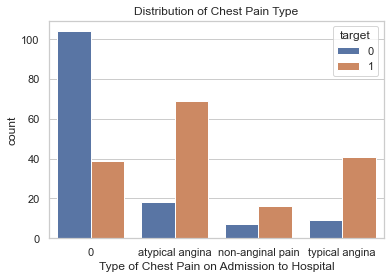

In [46]:
#let's look at the different types of chest pain and how they relate to heart disease
#remember 0 is no chest pain at hospitalization
#looks like chest pain is associated with more cases of heart disease

dt['chest_pain_type']= dt['chest_pain_type'].astype('category')
sns.countplot(x="chest_pain_type", hue= "target", data=dt)
plt.xlabel('Type of Chest Pain on Admission to Hospital')
plt.title('Distribution of Chest Pain Type')

Text(0.5, 1.0, 'Distribution of Number of Unblocked Major Blood Vessels')

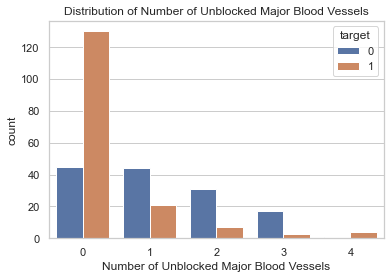

In [45]:
#Number of major vessels is number of unblocked main blood vessels, the less means more risk of heart disease
#People with no unblocked blood vessels have high incidence of heart disease
dt['num_major_vessels']= dt['num_major_vessels'].astype('category')
sns.countplot(x="num_major_vessels", hue= "target", data=dt)
plt.xlabel('Number of Unblocked Major Blood Vessels')
plt.title('Distribution of Number of Unblocked Major Blood Vessels')

In [24]:
#Filter data set to those with heart disease diagnosis to get a closer look within this sample
hd=dt[dt['target']==1]

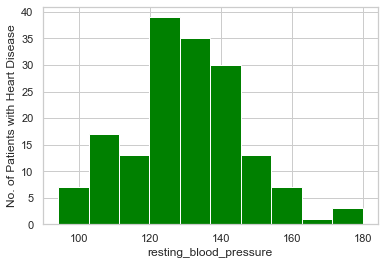

In [25]:
# Explore Blood pressure with a Histogram Plot
#Looks like a fairly normal distribution, nothing too signficant to note
#does not appear that more people have higher blood pressure

plt.hist(hd['resting_blood_pressure'], bins= 10, facecolor= 'green')
plt.xlabel('resting_blood_pressure')
plt.ylabel('No. of Patients with Heart Disease')
plt.show()

In [26]:
#Drop binary categorical variable for correlation
#Only correlate numerical variables
dt_quant=dt.drop(columns=['target'])

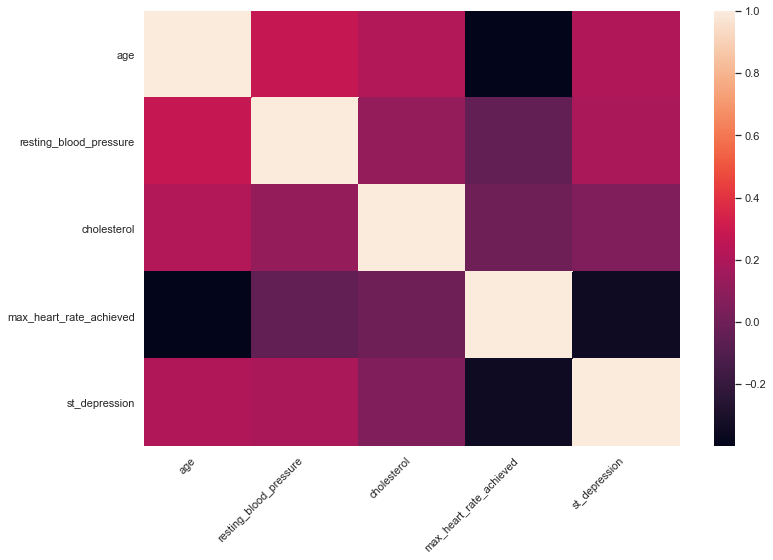

In [27]:
#High level heat map to display correlation
plt.figure(figsize = (12,8))
corrplot = sns.heatmap(dt_quant.corr())
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right') #For X axis labels
plt.show()

#Seems like Blood pressure & age, blood pressure&number of major vessels are the most positively correlated to each other
#However these relationships on their own cannot see the relationship to heart disease.
#Other variables do not show a significant correlation to diagnosis on heart disease


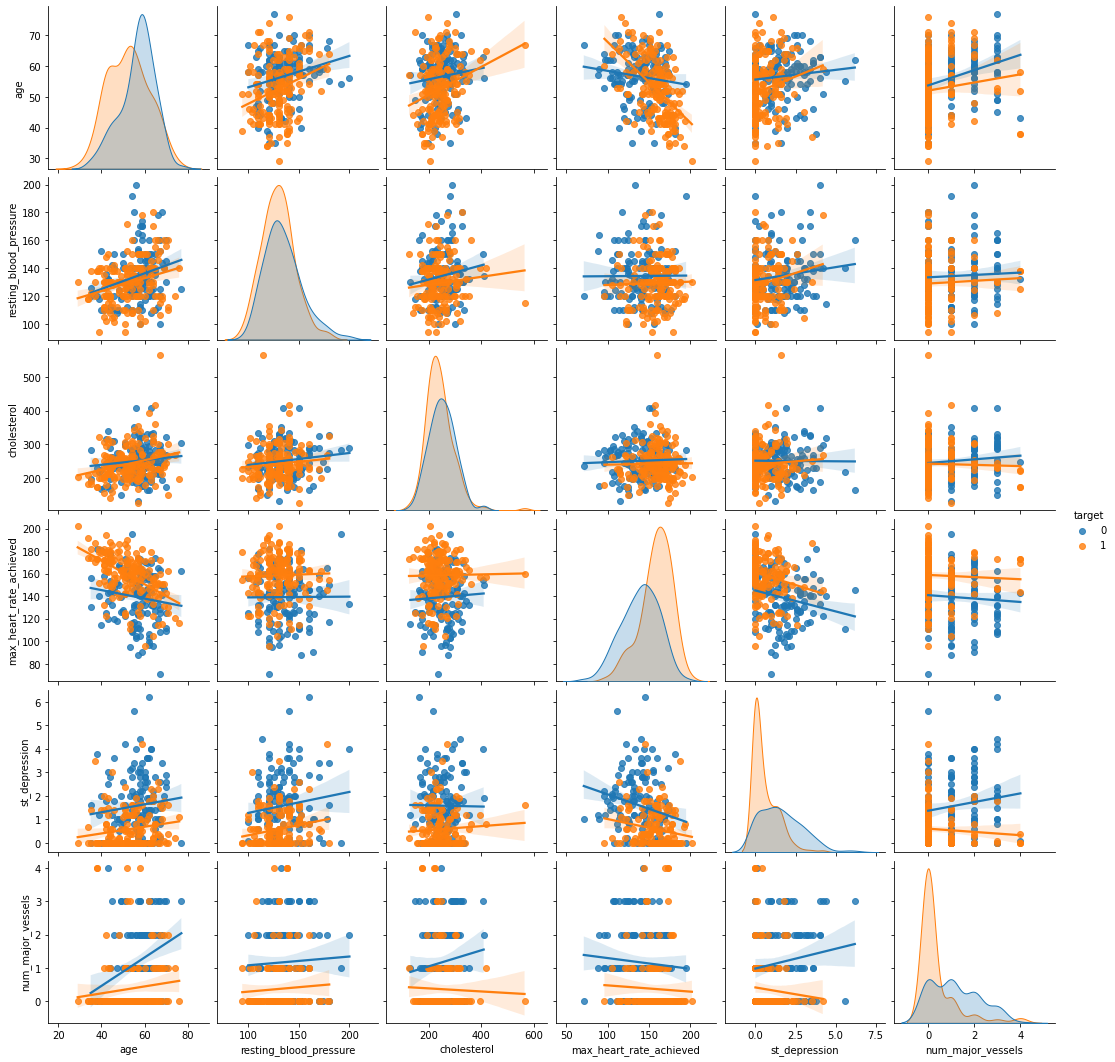

In [5]:
# Pairwise plot between all possible pairs of numeric variables
# It is a good way to understand the relationship between them.
sns.pairplot(dt, kind = 'reg', hue = 'target')
plt.show()


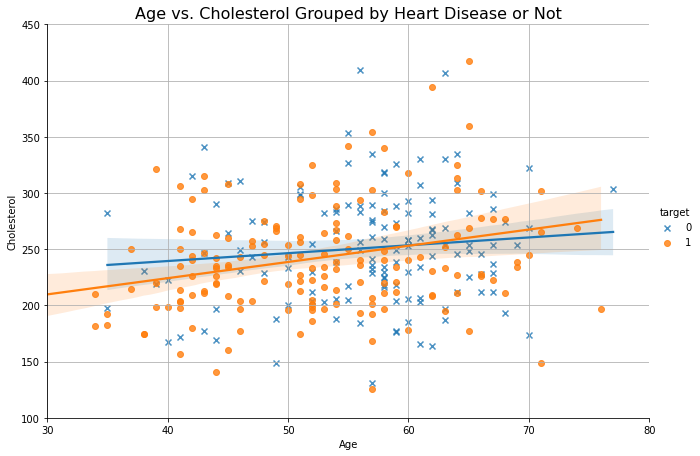

In [11]:
#Lets take a closer look at some variables we predict will have an effect on heart disease
#Relationship between cholesterol and heart disease is not obvious from this graph. There is no clear demarcation of those with heart disease and those without
#(Heart disease: Target=1, No heart disease: Target=0)
#Therefore cholesterol does not accurately predict heart disease as we previously thought.

regp_age_ch = sns.lmplot(x = 'age', y = 'cholesterol', hue = 'target', data = dt, markers=['x', 'o'], height = 6, aspect = 1.5)
regp_age_ch.set(xlim = (30, 80), ylim = (100, 450))
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol Grouped by Heart Disease or Not', fontsize = 16)
plt.grid()
plt.show()

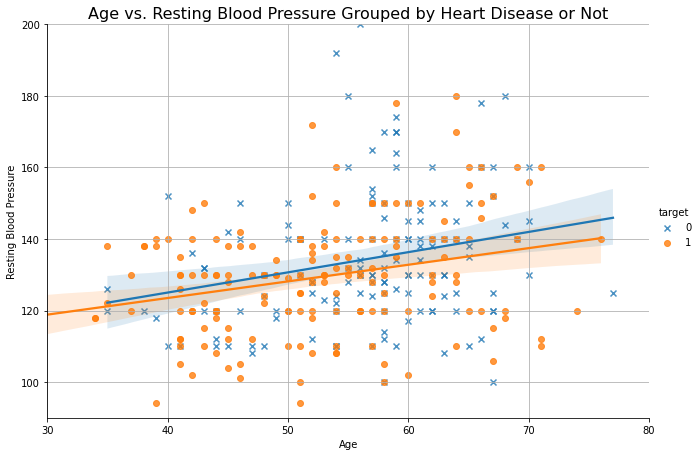

In [12]:
#Relationship between blood pressure and heart disease is not obvious from this graph. There is no clear demarcation of those with heart disease and those without
#(Heart disease: Target=1, No heart disease: Target=0)
#Therefore blood pressure also does not accurately predict heart disease as we previously thought.

regp_age_bp = sns.lmplot(x = 'age', y = 'resting_blood_pressure', hue = 'target', data = dt, markers=['x', 'o'], height = 6, aspect = 1.5)
regp_age_bp.set(xlim = (30, 80), ylim = (90, 200))
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs. Resting Blood Pressure Grouped by Heart Disease or Not', fontsize = 16)
plt.grid()
plt.show()

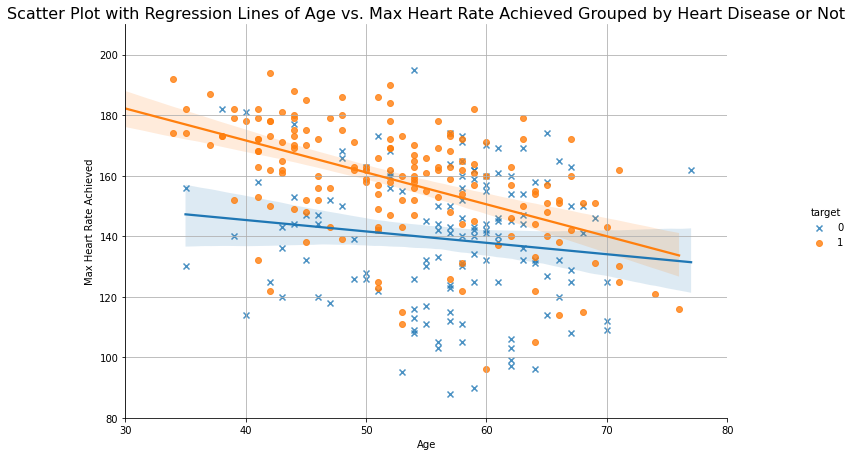

In [13]:
#Let's narrow it down to a few key variables

# The scatter plot of age vs. max heart rate achieved with a category of whether has a heart disease or not
# and the linear regression models which fit across the two subsets
regp_age_maxHeartR = sns.lmplot(x = 'age', y = 'max_heart_rate_achieved', hue = 'target', data = dt, markers=['x', 'o'], height = 6, aspect = 1.5)
regp_age_maxHeartR.set(xlim = (30, 80), ylim = (80, 210))
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.title('Scatter Plot with Regression Lines of Age vs. Max Heart Rate Achieved Grouped by Heart Disease or Not', fontsize = 16)
plt.grid()
plt.show()

# From the plot, we can see that for the whole range of age, a person with a larger max heart rate achieved is more likely to have a heart disease.
# It is quite obvious because the regression line of heart diseases is always above the no heart diseases.
# And besides, we can also see from this plot that our max heart rate will become smaller and smaller when we get aged.


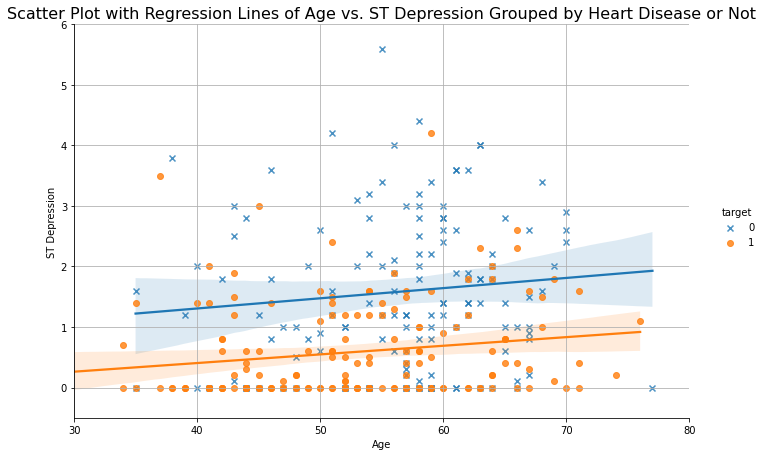

In [14]:

# The scatter Plot of age vs. ST depression with a category of whether has a heart disease or not
# and the linear regression models which fit across the two subsets
regp_age_st = sns.lmplot(x = 'age', y = 'st_depression', hue = 'target', data = dt, markers=['x', 'o'], height = 6, aspect = 1.5)
regp_age_st.set(xlim = (30, 80), ylim = (-0.5, 6))
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.title('Scatter Plot with Regression Lines of Age vs. ST Depression Grouped by Heart Disease or Not', fontsize = 16)
plt.grid()
plt.show()

# We can see most of the data of heart disease are located on the line of st_depression = 0
#This is another good indicator of heart disease as supported by the initial comparative histogram above

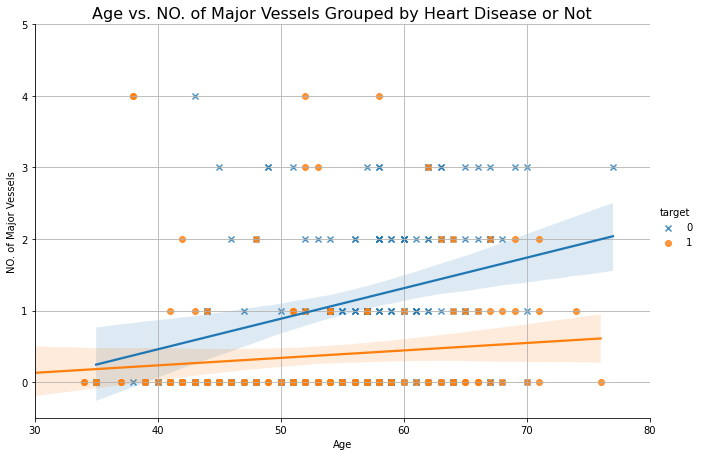

In [15]:
regp_age_mv = sns.lmplot(x = 'age', y = 'num_major_vessels', hue = 'target', data = dt, markers=['x', 'o'], height = 6, aspect = 1.5)
regp_age_mv.set(xlim = (30, 80), ylim = (-0.5, 5))
plt.xlabel('Age')
plt.ylabel('NO. of Major Vessels')
plt.title('Age vs. NO. of Major Vessels Grouped by Heart Disease or Not', fontsize = 16)
plt.grid()
plt.show()

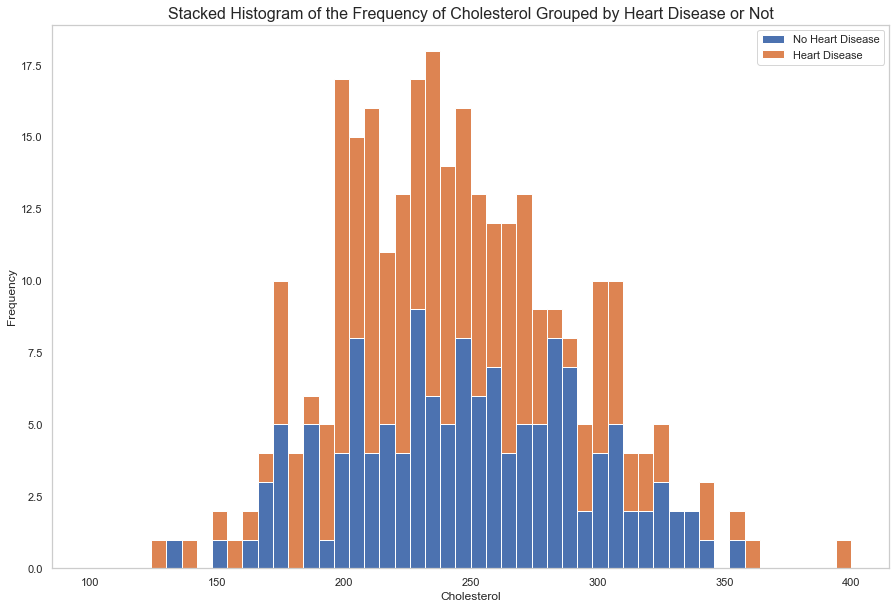

In [31]:

# Stacked histogram of the frequency of cholesterol for heart disease vs. no heart disease
df_agg = dt[['cholesterol','target']].groupby('target')
value = [df['cholesterol'].values.tolist() for i, df in df_agg]

plt.figure(figsize=[15, 10])
plt.hist(value, 50, stacked=True, range = (100, 400), label = ['No Heart Disease','Heart Disease'])
plt.legend()
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of the Frequency of Cholesterol Grouped by Heart Disease or Not', fontsize = 16)
plt.grid()
plt.show()

# It is just another way to show the relationship between cholesterol and heart disease.
# We divided the cholesterol dataset into 50 parts and canceled the extreme small and large data.
# With the histogram of frequency stacked together, it is easier to see the effect of cholesterol on heart disease.
#Because in the sample we have more people with heart disease then not, the graph may be misleading
#However if we look at the distribution (mean and standard deviation of the graph) we can see the two are very similar
#Therefore cholesterol does not accurately predict heart disease

# Conclusion
Initially we hypothesized that age, blood pressure, sugar level, and cholesterol would have an obvious effect on heart disease prediction.
We created comparative graphs, regression plots, and correlations to look at the relationships between the variables and the target.
Based on our finding we realized, suprisingly the effect of age, blood pressure, sugar level, and cholesterol 
on having heart disease was not as significant as we thought.
These factors are tradionally thought to be major contributors to heart disease.
But patients in the heart disease vs no heart disease groups showed similar distributions for those variables.
Based on our analysis, the variables max heart rate and ECG results (ST depression), and number of unblocked blood vessels are better predictors of heart disease.

This is a surprising result but it shows that we should not go into data analysis with too many preconceived ideas about what the result will be.
However we should not completely throw out traditional variables as predictors of heart disease.
The max heart rate and ECG results (ST depression), and number of unblocked blood vessels given in the dataset are only measured in the hospital, when the patient often has already been admitted to the hospital.
So it is not entirely helpful from a preventive standpoint, only from diagnostic standpoint.
Other considerations that were not included in the dataset is the effect of medication.
If the patient has heart disease but is on medication, that masks their true blood pressure, cholesterol, and so on, which may be misleading for data analysis.
In addition, this is a relativley small sample set, more suitable for interpolation and predicting within the dataset than making generalizations for a population.
Further observation and analysis may be required for an extensive and thorough understanding behind heart disease and human predictive attributes.